LINEAR REGRESSION

Saat ini menggunakan latihan dengan data Luas Panen, Produksi, dan Produktivitas Padi Menurut Provinsi, 2024 dari bulan Oktober-Desember

load Library

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Load Datasets

In [32]:
#nama dataframe menggunakan df sesuai dengan literasi latihan Multivariate Linear Regression.ipynb
#Feature yang digunakan adalah : 'Luas Panen(ha)','Produktivitas (ku/ha)', 'Produksi (ton)'
df = pd.read_csv('data.csv', usecols=['Luas Panen (ha)', 'Produktivitas (ku/ha)', 'Produksi (ton)'])
# Menghapus baris terakhir
df = df.iloc[:-1]  # Mengambil semua baris kecuali baris terakhir karena baris terakhis hanya jumlah dari semua data diatas

Memunculkan data

In [33]:
#Melihat 5 baris teratas dari data
#Independent variabel (x) adalah Luas Panen (ha), Produktivitas (ku/ha)
#Dependent variabel(y) adalah Produksi (ton)
df.head()

,Luas Panen (ha),Produktivitas (ku/ha),Produksi (ton)
0,301081.97,54.58,1643355.07
1,419089.12,51.40,2154117.08
2,296215.93,45.64,1352048.77
3,57003.35,39.62,225836.50
4,64119.24,45.44,291367.31


Penjelasan setiap kolom : 
1. Luas Panen (ha) = Luas lahan yang digunakan untuk menanam padi dalam satuan hektar.
2. Produktivitas (ku/ha) = Produktivitas padi dalam satuan kubik per hektar.
3. Produksi (ton) = Total produksi padi dalam satuan ton.


In [34]:
#mengetahui jumlah kolom dan baris dari data
#Data tersebut mempunyau 3 kolom (feature) dengan 38 baris
df.shape

(38, 3)

In [36]:
#melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll
#Dicek bahwa seluruh data dalam bentuk numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Luas Panen (ha)        38 non-null     float64
 1   Produktivitas (ku/ha)  38 non-null     float64
 2   Produksi (ton)         38 non-null     float64
dtypes: float64(3)
memory usage: 1.0 KB


In [37]:
#melihat statistical deskripsi dari data mulai dari mean, kuartil, standard deviasi, dan lain-lain
df.describe()

,Luas Panen (ha),Produktivitas (ku/ha),Produksi (ton)
count,3.800000e+01,38.000000,3.800000e+01
mean,2.643805e+05,44.169737,1.385769e+06
std,4.275318e+05,9.321203,2.433257e+06
min,2.668000e+01,14.790000,1.133300e+02
25%,2.031937e+04,39.627500,7.904314e+04
50%,8.082736e+04,45.250000,3.506010e+05
75%,2.921686e+05,50.882500,1.428100e+06
max,1.616235e+06,60.430000,9.226340e+06


membulatkan Produksi

In [38]:
#Mrubah tipe data dari Produksi yang semula float menjadi int
df['Produksi (ton)'] = df['Produksi (ton)'].astype('int')

Handling Missing Value

In [39]:
#Mencari dan menangani missing values, namun tidak ada
df.isnull().sum()

Luas Panen (ha)          0
Produktivitas (ku/ha)    0
Produksi (ton)           0
dtype: int64

Exploratory Data Analysis

In [40]:
df.head()

,Luas Panen (ha),Produktivitas (ku/ha),Produksi (ton)
0,301081.97,54.58,1643355
1,419089.12,51.40,2154117
2,296215.93,45.64,1352048
3,57003.35,39.62,225836
4,64119.24,45.44,291367


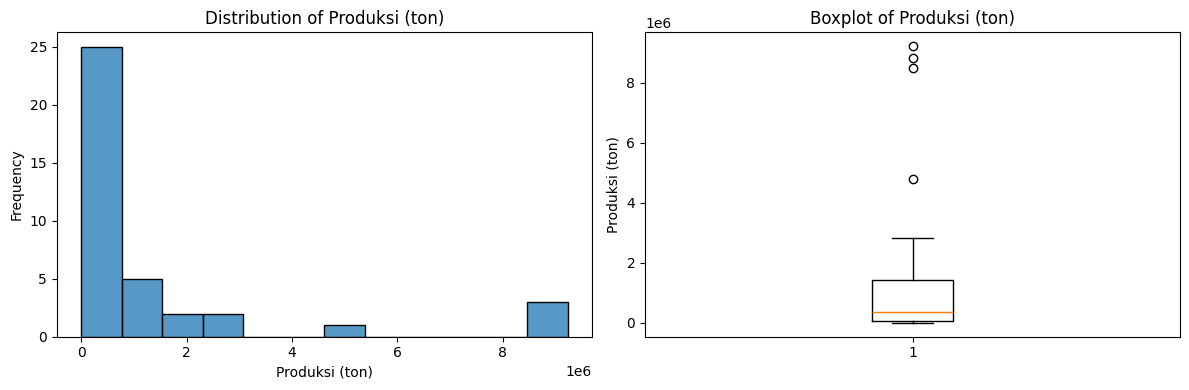

In [41]:
#Univariate analysis Produksi
#Melihat distribusi dari Produksi
f = plt.figure(figsize=(12, 4))

# First subplot
f.add_subplot(1, 2, 1)
sns.histplot(df['Produksi (ton)'])
plt.title('Distribution of Produksi (ton)')
plt.xlabel('Produksi (ton)')
plt.ylabel('Frequency')

# Second subplot
f.add_subplot(1, 2, 2)
plt.boxplot(df['Produksi (ton)'])
plt.title('Boxplot of Produksi (ton)')
plt.ylabel('Produksi (ton)')

# Show the plots
plt.tight_layout()  # Adjust layout untuk mencegah overlap
plt.show()

Dapat dilihat dengan keterangan le6 atau x 1jt

Dapat dilihat bahwa sebagian besar dibawah 1 juta ton

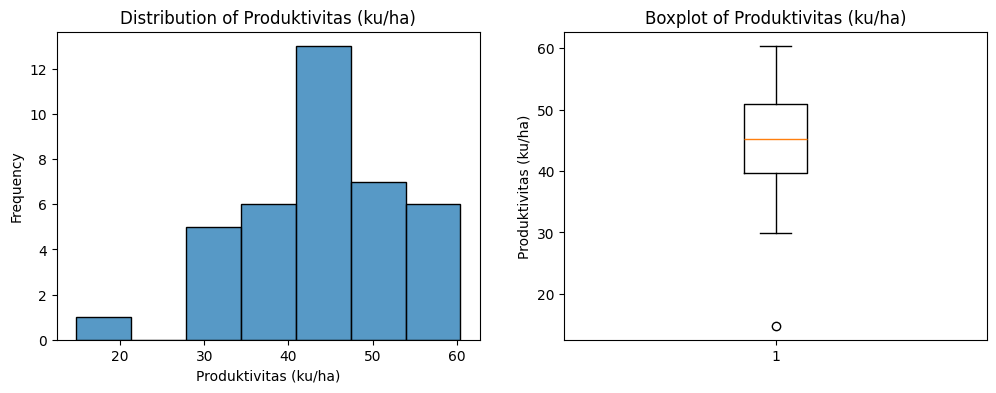

In [44]:
f = plt.figure(figsize=(12, 4))

# First subplot
f.add_subplot(1, 2, 1)
sns.histplot(df['Produktivitas (ku/ha)'])
plt.title('Distribution of Produktivitas (ku/ha)')
plt.xlabel('Produktivitas (ku/ha)')
plt.ylabel('Frequency')

# Second subplot
f.add_subplot(1, 2, 2)
plt.boxplot(df['Produktivitas (ku/ha)'])
plt.title('Boxplot of Produktivitas (ku/ha)')
plt.ylabel('Produktivitas (ku/ha)')

# Show the plots
plt.show()

Produktivitas terbanyak berada pada angka 40 hingga 50 atau sekitar 45

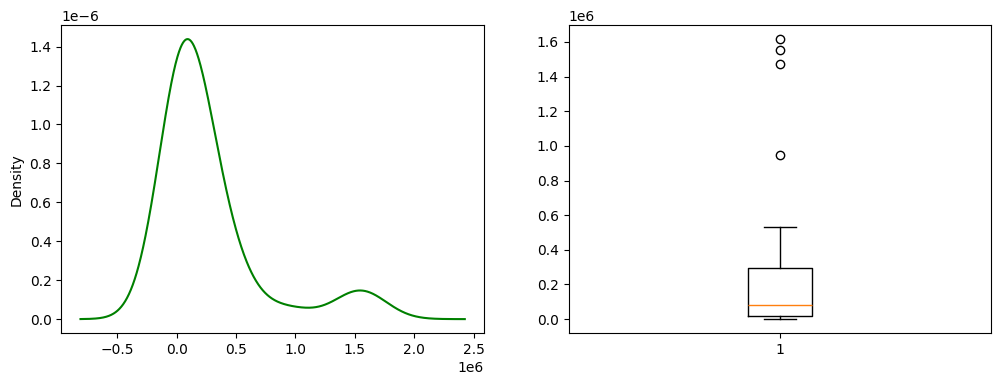

In [45]:
#Univariate analysis price
#Melihat distribusi dari price
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Luas Panen (ha)'].plot(kind='kde', c='g')

f.add_subplot(1,2,2)
plt.boxplot(df['Luas Panen (ha)'])
plt.show()

Density dari Luas panen paling tinggi di nilai 0,1 le6 atau 100.000
memiliki distribusi yang hampir mirip dengan distribusi normal namun persebaran kurang merata

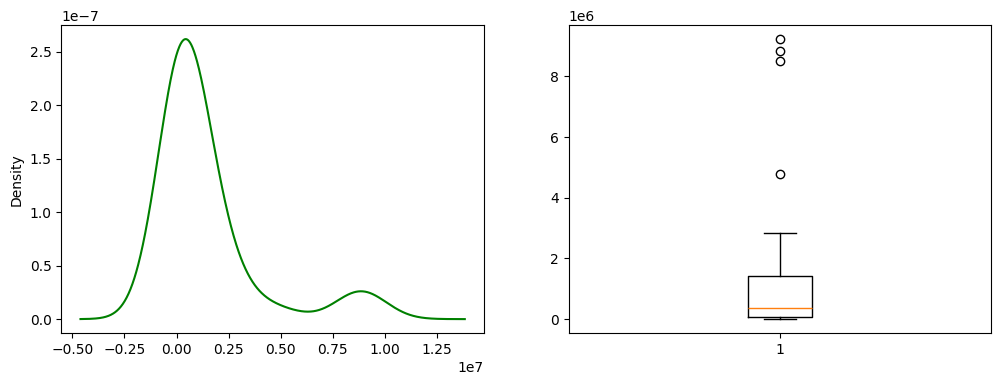

In [46]:
#Univariate analysis price
#Melihat distribusi dari price
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Produksi (ton)'].plot(kind='kde', c='g')

f.add_subplot(1,2,2)
plt.boxplot(df['Produksi (ton)'])
plt.show()

Dapat dilihat bahwa paling banyak dibawah 0,1 le7 atau dibawah 1 juta ton dan mirip dengan grafik batang Produksi (ton) sebelumnya

c:\Users\TUF Gaming - FX506HF\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x800 with 0 Axes>

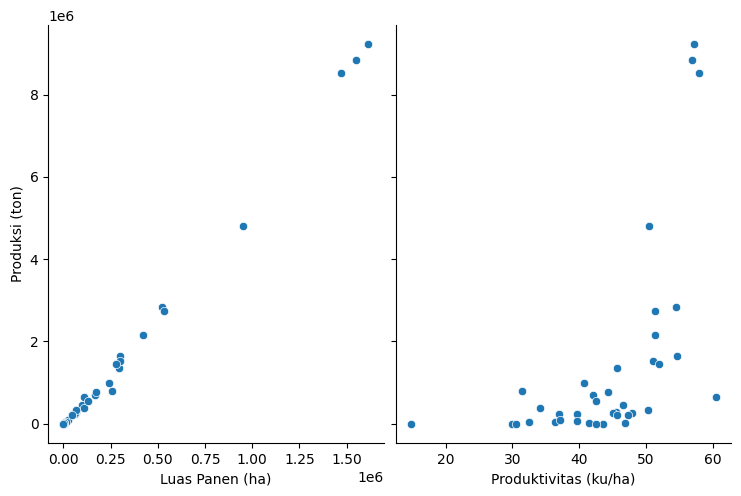

In [51]:
#Bivariate analysis antara independent variable dan dependent variable
#Melihat hubungan antara independent dan dependent
#Menggunakan pairplot
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['Luas Panen (ha)', 'Produktivitas (ku/ha)'], y_vars=['Produksi (ton)'], size=5, aspect=0.75)
plt.show()

In [65]:
correlation_matrix = df.corr()

# Style the correlation matrix with a gradient background and set the number format
styled_correlation_matrix = (
    correlation_matrix
    .style
    .background_gradient(cmap='coolwarm')  # You can change the colormap if desired
    .format("{:.2f}")  # Format numbers to 2 decimal places
)

# Display the styled correlation matrix
styled_correlation_matrix

,Luas Panen (ha),Produktivitas (ku/ha),Produksi (ton)
Luas Panen (ha),1.00,0.56,1.00
Produktivitas (ku/ha),0.56,1.00,0.57
Produksi (ton),1.00,0.57,1.00


1. Terdapat hubungan yang sangat kuat antara Luas Panen dan Produksi, bisa dikatakan bahwa ukuran lahan menentukan hasil panen.
2. Hubungan Luas Panen dengan Produktivitas dan antara Produktivitas dengan Produksi menunjukkan bahwa meskipun berpengaruh, namun tidak sekuat hubungan antara Luas Panen dan Produksi.
3. sehingga peningkatan Luas Panen yang paling efektif, sedangkan peningkatan Produktivitas juga penting tapi tidak sekuat faktor Luas Panen.

Modeling

In [66]:
#Recall data kita
df.head()

,Luas Panen (ha),Produktivitas (ku/ha),Produksi (ton)
0,301081.97,54.58,1643355
1,419089.12,51.40,2154117
2,296215.93,45.64,1352048
3,57003.35,39.62,225836
4,64119.24,45.44,291367


In [67]:
x = df.drop(columns='Produksi (ton)')
y = df['Produksi (ton)']

In [68]:
#Kedua, kita split data kita menjadi training and testing dengan porsi 70:30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)

In [69]:
#Cek shape dari data training dan testing
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(26, 2)
(26,)
(12, 2)
(12,)


In [70]:
#Ketiga, kita bikin object linear regresi
lin_reg = LinearRegression()

In [71]:
#Keempat, train the model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

LinearRegression()

In [72]:
#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[    5.65884418 -2121.03561008]
-267.5288627962582


In [73]:
#Kita coba buat kedalam dataframe agar kebih rapi
coef_dict = {
    'features': x.columns,
    'coef_value':lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,Luas Panen (ha),5.658844
1,Produktivitas (ku/ha),-2121.035610


In [74]:
y_pred = lin_reg.predict(x_test)

In [75]:
#Keenam, kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
lin_reg.score(x_test, y_test)

0.98985406258249

model kita mendapatkan akurasi score 98%

Prediksi

prediksi produksi (ton) dengan kriteria : 
Luas Panen (ha) = 1000.000
Produktivitas (ku/ha) = 50

In [79]:
#Prediksi Produksi (ton)
lin_reg.predict([[1000000,50]])

c:\Users\TUF Gaming - FX506HF\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5552524.86752344])

Prediksi produksi (ton) dengan kriteria luas panen 1jt hektar denngan produktivitas 50 kubik per hektar adalah 5.552.524,9 ton

Contoh lain produksi (ton) dengan kriteria mirip dengan daerah aceh 2024 : 
Luas panen (ha) = 301081.97
Produktivitas (ku/ha) = 54.58

In [80]:
#Prediksi Produksi (ton)
lin_reg.predict([[301081.97,54.58]])

c:\Users\TUF Gaming - FX506HF\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1587742.30024023])

Prediksi produksi (ton) dengan kriteria luas panen 1jt hektar denngan produktivitas 50 kubik per hektar adalah 1,587,742,3 ton